In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<ipython-input-5-96e86ed0cfdc>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [54]:
train_r = '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/train.csv'
test_r= '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/test.csv'
#temp_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/prob.csv'
#tempT_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/probT.csv'

In [55]:
train = pd.read_csv(train_r)
test = pd.read_csv(test_r)
#new = pd.read_csv(temp_r)
#newT=pd.read_csv(tempT_r)

In [8]:
train.columns

Index(['ID', 'first_party', 'second_party', 'facts', 'first_party_winner'], dtype='object')

In [9]:
test.columns

Index(['ID', 'first_party', 'second_party', 'facts'], dtype='object')

In [56]:
train.rename(columns={'facts':'facts_Org'},inplace=True)
test.rename(columns={'facts':'facts_Org'},inplace=True)

In [11]:
train.head()

,ID,first_party,second_party,facts_Org,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [12]:
profile = ProfileReport(train, title="Pandas Profiling Report")

In [13]:
profile.to_file("pandas_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts_Org           2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [57]:
train=pd.get_dummies(train, columns=['first_party_winner'],drop_first=True)
train

,ID,first_party,second_party,facts_Org,first_party_winner_1
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2478 non-null   object
 1   first_party           2478 non-null   object
 2   second_party          2478 non-null   object
 3   facts_Org             2478 non-null   object
 4   first_party_winner_1  2478 non-null   uint8 
dtypes: object(4), uint8(1)
memory usage: 80.0+ KB


In [58]:
temp=train
temp

,ID,first_party,second_party,facts_Org,first_party_winner_1
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [59]:
import re
from bs4 import BeautifulSoup

In [60]:
# Remove HTTP tags
%time temp['facts_Processed']=temp['facts_Org'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
temp

CPU times: user 415 ms, sys: 1.18 ms, total: 416 ms
Wall time: 425 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,On June 27 1962 Phil St Amant a candidate for ...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,Ramon Nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,An Alabama state court convicted Billy Joe Mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,Victor Linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,On April 24 1953 in Selma Alabama an intruder ...
...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1,Congress amended the Clean Air Act through the...
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1,Alliance Bond Fund Inc an investment fund purc...
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0,In 1992 the District Court sentenced Manuel D ...
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0,On March 8 1996 Enrico St Cyr a lawful permane...


In [61]:
#Lower Case
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: x.lower())
temp.head()

CPU times: user 6.59 ms, sys: 0 ns, total: 6.59 ms
Wall time: 7.99 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...


In [62]:
#Remove punctuations
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
temp.head()

CPU times: user 72.6 ms, sys: 277 µs, total: 72.8 ms
Wall time: 80.5 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...


In [63]:
#Remove unicodes
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
temp.head()

CPU times: user 46.2 ms, sys: 919 µs, total: 47.1 ms
Wall time: 50.1 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...


In [64]:
#Remove numbaer
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[0-9]', '', x))
temp.head()

CPU times: user 40.6 ms, sys: 899 µs, total: 41.5 ms
Wall time: 43.2 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june phil st amant a candidate for public...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april in selma alabama an intruder broke ...


In [65]:
import nltk
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [67]:
month=['january', 'febuary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

In [68]:
# Remove stopwords
stop_words = stopwords.words('english')
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
temp.head()

CPU times: user 747 ms, sys: 2.16 ms, total: 749 ms
Wall time: 754 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,june phil st amant candidate public office mad...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,april selma alabama intruder broke apartment d...


In [69]:
# Remove month
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in month]))
temp.head()

CPU times: user 74.7 ms, sys: 0 ns, total: 74.7 ms
Wall time: 74.5 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,phil st amant candidate public office made tel...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,selma alabama intruder broke apartment daughte...


In [70]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
temp.head()

CPU times: user 1.84 s, sys: 7.33 ms, total: 1.84 s
Wall time: 1.89 s


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,phil st amant candidate public office made tel...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,selma alabama intruder broke apartment daughte...


In [71]:
#Removing Stop words again after Lemmatize
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
temp.head()

CPU times: user 1.08 s, sys: 2.35 ms, total: 1.08 s
Wall time: 1.13 s


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,phil st amant candidate public office made tel...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,selma alabama intruder broke apartment daughte...


In [72]:
#remove name

from nltk.corpus import names
all_names=set(names.words())

%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in all_names]))
temp.head()

CPU times: user 79 ms, sys: 478 µs, total: 79.5 ms
Wall time: 84.2 ms


,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,phil st amant candidate public office made tel...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,selma alabama intruder broke apartment daughte...


###Stage 2 : Embedding on the processed text data

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [75]:
from nltk import sent_tokenize

In [76]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [77]:
#15 most common and 15 most rare words
common_words = get_n_words(temp['facts_Processed'], "top", 15)
rare_words = get_n_words(temp['facts_Processed'], "bottom", 15)

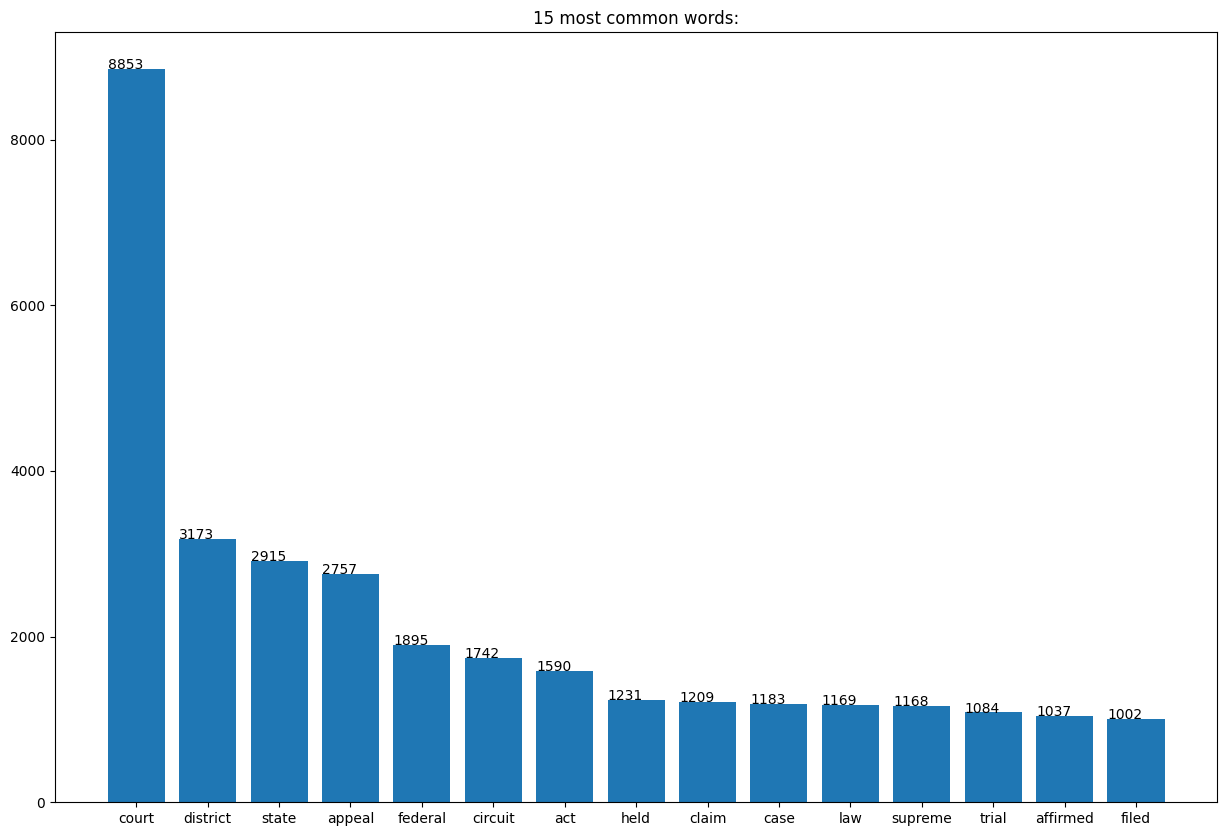

In [78]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

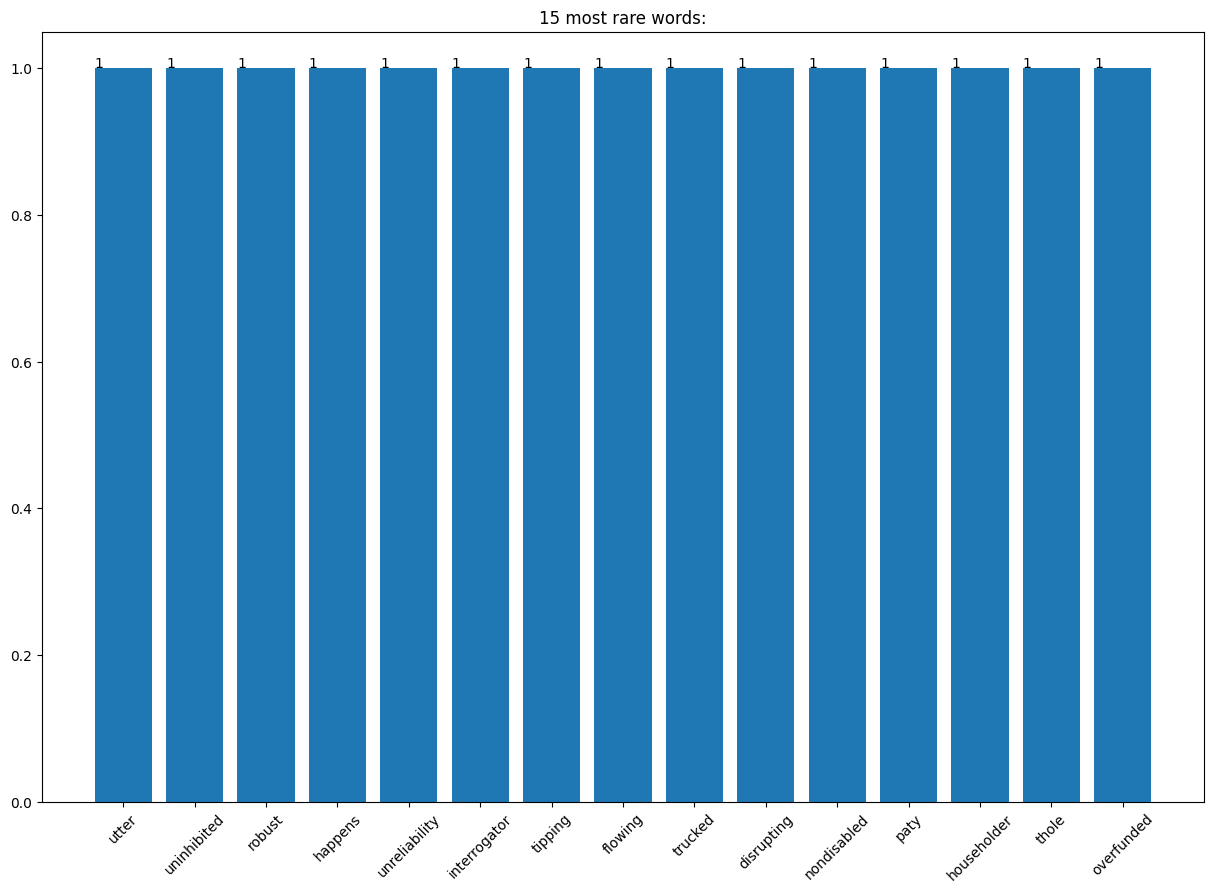

In [79]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
temp['facts_sent']=0

for i in range(2478):
  temp.facts_sent[i]=nltk.sent_tokenize(temp.facts_Org[i])

temp

,ID,first_party,second_party,facts_Org,first_party_winner_1,facts_Processed,facts_sent
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,phil st amant candidate public office made tel...,"[On June 27, 1962, Phil St. Amant, a candidate..."
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson riding bike suffered lethal blow ...,[Ramon Nelson was riding his bike when he suff...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,alabama state court convicted billy joe magwoo...,[An Alabama state court convicted Billy Joe Ma...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter convicted state court eviden...,[Victor Linkletter was convicted in state cour...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,selma alabama intruder broke apartment daughte...,"[On April 24, 1953 in Selma, Alabama, an intru..."
...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1,congress amended clean air act energy policy a...,[Congress amended the Clean Air Act through th...
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1,alliance bond fund inc investment fund purchas...,"[Alliance Bond Fund, Inc., an investment fund,..."
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0,district court sentenced manuel peguero month ...,"[In 1992, the District Court sentenced Manuel ..."
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0,enrico st cyr lawful permanent resident pled g...,"[On March 8, 1996, Enrico St. Cyr, a lawful pe..."


In [84]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=(1, 3))

%time tpl_tf = tf_vectorizer.fit_transform(temp['facts_Processed'])
display("Bow-TF :", tpl_tf.shape)
train_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())
train_tf.head()


CPU times: user 1.98 s, sys: 73.4 ms, total: 2.05 s
Wall time: 2.06 s


'Bow-TF :'

(2478, 800)

,abuse,access,according,account,act,action,activity,actual,additional,administration,...,witness,woman,work,worker,working,would,writ,year,year old,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
#Preparing processed and BoW-TF embedded data for Classification
train_tf_m = pd.concat([temp, train_tf], axis = 1)
train_tf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tf_m.shape)
display(train_tf_m.head())
display(train_tf_m.tail())

(2478, 805)


,ID,first_party,second_party,first_party_winner_1,facts_sent,abuse,access,according,account,act,...,witness,woman,work,worker,working,would,writ,year,year old,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,"[On June 27, 1962, Phil St. Amant, a candidate...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,[Ramon Nelson was riding his bike when he suff...,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,[An Alabama state court convicted Billy Joe Ma...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAIN_0003,Linkletter,Walker,0,[Victor Linkletter was convicted in state cour...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAIN_0004,William Earl Fikes,Alabama,1,"[On April 24, 1953 in Selma, Alabama, an intru...",0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,ID,first_party,second_party,first_party_winner_1,facts_sent,abuse,access,according,account,act,...,witness,woman,work,worker,working,would,writ,year,year old,york
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,[Congress amended the Clean Air Act through th...,0,0,0,0,2,...,0,0,0,0,0,1,0,2,0,0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,"[Alliance Bond Fund, Inc., an investment fund,...",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2475,TRAIN_2475,Peguero,United States,0,"[In 1992, the District Court sentenced Manuel ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,"[On March 8, 1996, Enrico St. Cyr, a lawful pe...",0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2477,TRAIN_2477,Markman,"Westview Instruments, Inc.",0,[Herbert Markman owns the patent to a system t...,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=(1,3))

%time tpl_tfidf = tfidf_vectorizer.fit_transform(temp['facts_Processed'])

CPU times: user 1.64 s, sys: 154 ms, total: 1.79 s
Wall time: 2.16 s


In [92]:
display("Bow-TF:IDF :", tpl_tfidf.shape)

train_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=temp.index)
display(train_tfidf.head())

'Bow-TF:IDF :'

(2478, 879)

,abuse,access,according,account,act,acting,action,activity,actual,additional,...,worker,working,would,writ,writ habeas,writ habeas corpus,year,year later,year old,york
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.124891,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.219975,0.247843,0.247843,0.070184,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.174335,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.098938,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [93]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
train_tfidf_m = pd.concat([temp, train_tfidf], axis = 1)
train_tfidf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tfidf_m.shape)
display(train_tfidf_m.head())
display(train_tfidf_m.tail())

(2478, 884)


,ID,first_party,second_party,first_party_winner_1,facts_sent,abuse,access,according,account,act,...,worker,working,would,writ,writ habeas,writ habeas corpus,year,year later,year old,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,"[On June 27, 1962, Phil St. Amant, a candidate...",0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,[Ramon Nelson was riding his bike when he suff...,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.219975,0.247843,0.247843,0.070184,0.0,0.0,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,[An Alabama state court convicted Billy Joe Ma...,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,TRAIN_0003,Linkletter,Walker,0,[Victor Linkletter was convicted in state cour...,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,1,"[On April 24, 1953 in Selma, Alabama, an intru...",0.0,0.174335,0.0,0.0,0.0,...,0.0,0.0,0.098938,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


,ID,first_party,second_party,first_party_winner_1,facts_sent,abuse,access,according,account,act,...,worker,working,would,writ,writ habeas,writ habeas corpus,year,year later,year old,york
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,[Congress amended the Clean Air Act through th...,0.0,0.0,0.000000,0.0,0.154443,...,0.0,0.0,0.101977,0.0,0.0,0.0,0.209223,0.0,0.0,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,"[Alliance Bond Fund, Inc., an investment fund,...",0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.098721,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2475,TRAIN_2475,Peguero,United States,0,"[In 1992, the District Court sentenced Manuel ...",0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,"[On March 8, 1996, Enrico St. Cyr, a lawful pe...",0.0,0.0,0.000000,0.0,0.162951,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2477,TRAIN_2477,Markman,"Westview Instruments, Inc.",0,[Herbert Markman owns the patent to a system t...,0.0,0.0,0.128198,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


###Stage 3 : Model Building

In [94]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [97]:
train_tf_m.columns

Index(['ID', 'first_party', 'second_party', 'first_party_winner_1',
       'facts_sent', 'abuse', 'access', 'according', 'account', 'act',
       ...
       'witness', 'woman', 'work', 'worker', 'working', 'would', 'writ',
       'year', 'year old', 'york'],
      dtype='object', length=805)